# 1. Noise Reduction
이미지에서 노이즈가 있으면 엣지를 제대로 찾는 것이 어려울 수 있다. 따라서 5x5 가우시안 필터를 이용해 노이즈 줄여줌.


# 2. Gradient 값이 높은 부분 찾기
Sobel 커널을 수평 방향, 수직 방향으로 적용하여 각 방향의 gradient 획득한다. <br>수평 방향의 gradient를 Gx, <br>수직 방향의 gradient를 Gy라고 한다. <br>픽셀(x,y)에서 edge gradient는 아래의 식으로 찾을 수 있다.

![1](img/form_1.gif)
![2](img/form_2.gif)
Gradient의 방향은 edge에 수직인 방향이다. 아래 그림을 보자.

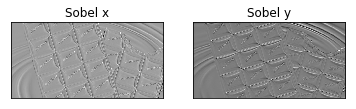

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img/chocolate.jpg', cv2.IMREAD_GRAYSCALE)

# Sobelx 는 세로선을 검출, Sobely 는 가로선을 검출
Sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
Sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

plt.subplot(1,2,1), plt.imshow(Sobelx, cmap='gray')
plt.title('Sobel x'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2), plt.imshow(Sobely, cmap='gray')
plt.title('Sobel y'), plt.xticks([]), plt.yticks([])

plt.show()

`Sobelx`는 x방향으로만 1차 미분하고 kernel size는 3. x방향으로 미분한다는 것은 **x방향(가로방향)**으로 원본 이미지를 따라가다가 픽셀 값이 변화하는 지점을 찾아내는 것이기 때문에 **세로선**이 검출된다..<br>
`Sobely`는 y방향으로만 1차 미분하고 kernel size는 3. y방향으로 미분한다는 것은 **y방향(세로방향)**으로 원본 이미지를 따라가다가 픽셀값 변화 지점을 찾아내는 것이기 때문에 **가로선**이 검출된다.

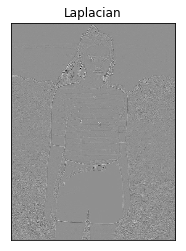

In [13]:
# Laplacian 은 x방향 편미분 결과와 y방향 편미분 결과를 더한 형태
img = cv2.imread('img/test8.jpg', cv2.IMREAD_GRAYSCALE)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
plt.subplot(), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

# 3. 최대값이 아닌 픽셀의 값을 0으로 만들기
2단계를 거친 후, edge에 기여하지 않은 픽셀을 제거하기 위해 이미지 전체를 스캔한다. 이미지를 스캔하는 동안 gradient 방향으로 스캔 구역에서 gradient의 최대값을 가진 픽셀을 찾는다.
![1](img/img_1.jpg)
(출처 : https://m.blog.naver.com/samsjang/220507996391)<br>
위 그림에서 A는 세로선 엣지 위에 있는 픽셀. 이때 Gradient 방향은 수평방향이다. B와 C는 gradient 방향에 놓인 픽셀이다. <br>A지점에서 gradient 값이 B, C보다 큰지 아닌지 체크한다. A에서의 값이 가장 크면 다음 단계로 넘어가고, 그렇지 않으면 엣지가 아니니까 값을 0으로 만든다.

# 4. Hyteresis Thresholding
4단계는 3단계를 거친 것들이 실제 엣지인지 아닌지 판단하는 단계이다. 먼저 threshold를 minVal, maxVal 2개 잡는다. maxVal보다 높은 부분은 확실히 엣지이고, minVal보다 낮은 부분은 엣지가 아니라고 판단한다. minVal, maxVal 사이에 있는 값들은 이 픽셀들의 연결구조를 보고 엣지인지 아닌지 판단한다. *(연결되어 있다는 것이 무슨 뜻인지, 어떻게 판단하는지는 잘 모르겠다.)*

![1](img/img_2.jpg)
(출처 : https://m.blog.naver.com/samsjang/220507996391)<br>
A는 maxVal보다 큰 값이므로 확실히 엣지이다.<br>B와 C는 minVal과 maxVal 사이에 있는 픽셀이니까 연결구조를 본다.<br>B는 확실한 엣지인 A와 연결되어 있지 않지만,<br>C는 확실한 엣지인 A와 연결되어 있으므로 엣지이다. 따라서 B는 제거하고 C는 남겨둔다.



1단계에서 4단계까지 완료하고 나면 이미지에서 엣지로 판단된 부분만 남게 된다.

`[ref]`<br>
https://m.blog.naver.com/samsjang/220506567638
https://m.blog.naver.com/samsjang/220507996391